In [1]:
import numpy as np
import pandas as pd
import math
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Master Data Sets.ipynb")
from matplotlib import pyplot as plt
from ast import literal_eval
from sklearn.metrics.pairwise import haversine_distances
import itertools
import seaborn as sns
from matplotlib import style
style.use('ggplot')

In [2]:
train_cust =pd.read_csv('train_customers.csv',parse_dates=['created_at','updated_at'])
test_cust =pd.read_csv('test_customers.csv',parse_dates=['created_at','updated_at'])
train_loc =pd.read_csv('train_locations.csv')
test_loc =pd.read_csv('test_locations.csv')
vendors =pd.read_csv('vendors.csv',parse_dates=['created_at','updated_at'])
orders =pd.read_csv('orders.csv',parse_dates=['created_at','delivery_date'])
submission =pd.read_csv('SampleSubmission.csv')
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", 200)

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (15,16,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
train_cust= train_cust.rename({'akeed_customer_id': 'customer_id'}, axis=1)
test_cust= test_cust.rename({'akeed_customer_id': 'customer_id'}, axis=1)

In [4]:
test_cust = test_cust.drop_duplicates(subset='customer_id', keep="first")
train_cust = train_cust.drop_duplicates(subset='customer_id', keep="first")

In [5]:
def haversine(lat1, lon1, lat2, lon2,to_radians=True, earth_radius=6371):
    

    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])
    
    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))


In [6]:
dist1=train_loc[['customer_id','location_number','latitude','longitude']]
dist2=vendors[['id','latitude','longitude']]
dist=dist1.assign(key=1).merge(dist2.assign(key=1), on='key').drop('key',axis=1)

In [7]:
dist['distance'] = \
    haversine(dist['latitude_x'], dist['longitude_x'], dist['latitude_y'], dist['longitude_y'])

In [8]:
dist

,customer_id,location_number,latitude_x,longitude_x,id,latitude_y,longitude_y,distance
0,02SFNJH,0,1.682392,-78.789737,4,-0.588596,0.754434,8847.430953
1,02SFNJH,0,1.682392,-78.789737,13,-0.471654,0.744470,8845.913268
2,02SFNJH,0,1.682392,-78.789737,20,-0.407527,0.643681,8834.488717
3,02SFNJH,0,1.682392,-78.789737,23,-0.585385,0.753811,8847.350413
4,02SFNJH,0,1.682392,-78.789737,28,0.480602,0.552850,8821.455686
...,...,...,...,...,...,...,...,...
5950295,HWELAU8,1,-0.067043,0.648221,849,-1.588060,-0.066441,186.863629
5950296,HWELAU8,1,-0.067043,0.648221,855,2.145206,0.745025,246.226148
5950297,HWELAU8,1,-0.067043,0.648221,856,0.251469,0.483632,39.866058
5950298,HWELAU8,1,-0.067043,0.648221,858,0.019817,0.587087,11.810814


In [9]:
dist_des=dist['distance'].value_counts().rename_axis('distance').reset_index(name='counts')
dist_des.sort_values(by='distance', ascending=True)

,distance,counts
3979360,5.382287e-12,1
2704363,7.183735e-12,1
4519644,1.613687e-11,1
5474538,2.648213e-03,1
4451112,1.369540e-02,1
...,...,...
3538040,1.577797e+04,1
1771823,1.577803e+04,1
1446600,1.578530e+04,1
4866320,1.588988e+04,1


In [10]:
tdist1=test_loc[['customer_id','location_number','latitude','longitude']]
tdist2=vendors[['id','latitude','longitude']]
tdist=tdist1.assign(key=1).merge(tdist2.assign(key=1), on='key').drop('key',axis=1)

In [11]:
tdist['distance'] = \
    haversine(tdist['latitude_x'], tdist['longitude_x'], tdist['latitude_y'], tdist['longitude_y'])

In [12]:
tdist_des=tdist['distance'].value_counts().rename_axis('distance').reset_index(name='counts')
tdist_des.sort_values(by='distance', ascending=True)

,distance,counts
1663652,0.000000,1
7128,0.021050,1
385682,0.027751,1
1569946,0.033802,1
851041,0.043896,1
...,...,...
759370,18349.563448,1
1108008,18354.604178,1
1231557,18356.732460,1
170488,18357.324619,1


In [13]:
dist

,customer_id,location_number,latitude_x,longitude_x,id,latitude_y,longitude_y,distance
0,02SFNJH,0,1.682392,-78.789737,4,-0.588596,0.754434,8847.430953
1,02SFNJH,0,1.682392,-78.789737,13,-0.471654,0.744470,8845.913268
2,02SFNJH,0,1.682392,-78.789737,20,-0.407527,0.643681,8834.488717
3,02SFNJH,0,1.682392,-78.789737,23,-0.585385,0.753811,8847.350413
4,02SFNJH,0,1.682392,-78.789737,28,0.480602,0.552850,8821.455686
...,...,...,...,...,...,...,...,...
5950295,HWELAU8,1,-0.067043,0.648221,849,-1.588060,-0.066441,186.863629
5950296,HWELAU8,1,-0.067043,0.648221,855,2.145206,0.745025,246.226148
5950297,HWELAU8,1,-0.067043,0.648221,856,0.251469,0.483632,39.866058
5950298,HWELAU8,1,-0.067043,0.648221,858,0.019817,0.587087,11.810814


In [14]:
dist.sort_values(by='distance', ascending=True)

,customer_id,location_number,latitude_x,longitude_x,id,latitude_y,longitude_y,distance
4702470,ADL2P50,1,0.005748,0.482281,303,0.005748,0.482281,5.382287e-12
2976788,ZGFSYCZ,13,-0.116173,0.570707,676,-0.116173,0.570707,7.183735e-12
4412682,VVWLRL0,0,2.015615,0.749220,573,2.015615,0.749220,1.613687e-11
2799742,3CJKSR9,6,-0.060056,0.652652,191,-0.060048,0.652630,2.648213e-03
5267974,3T31BBH,0,-1.002260,0.078609,386,-1.002137,0.078609,1.369540e-02
...,...,...,...,...,...,...,...,...
5919895,O0LALCF,0,NaN,NaN,849,-1.588060,-0.066441,NaN
5919896,O0LALCF,0,NaN,NaN,855,2.145206,0.745025,NaN
5919897,O0LALCF,0,NaN,NaN,856,0.251469,0.483632,NaN
5919898,O0LALCF,0,NaN,NaN,858,0.019817,0.587087,NaN


In [15]:
tdist

,customer_id,location_number,latitude_x,longitude_x,id,latitude_y,longitude_y,distance
0,Z59FTQD,0,126.032278,-9.106019,4,-0.588596,0.754434,14010.898478
1,Z59FTQD,0,126.032278,-9.106019,13,-0.471654,0.744470,13998.133826
2,Z59FTQD,0,126.032278,-9.106019,20,-0.407527,0.643681,13992.442453
3,Z59FTQD,0,126.032278,-9.106019,23,-0.585385,0.753811,14010.552771
4,Z59FTQD,0,126.032278,-9.106019,28,0.480602,0.552850,13895.649154
...,...,...,...,...,...,...,...,...
1671995,3O8LSR3,0,-0.188562,0.827181,849,-1.588060,-0.066441,184.627859
1671996,3O8LSR3,0,-0.188562,0.827181,855,2.145206,0.745025,259.663855
1671997,3O8LSR3,0,-0.188562,0.827181,856,0.251469,0.483632,62.075568
1671998,3O8LSR3,0,-0.188562,0.827181,858,0.019817,0.587087,35.350024


In [16]:
tdist.describe()

,location_number,latitude_x,longitude_x,id,latitude_y,longitude_y,distance
count,1.672000e+06,1.671700e+06,1.671700e+06,1.672000e+06,1.672000e+06,1.672000e+06,1.671700e+06
mean,7.211124e-01,2.514850e+00,-2.527078e+01,2.888400e+02,1.875505e+00,8.036817e-01,3.345561e+03
std,1.163812e+00,2.210502e+01,3.693628e+01,2.410855e+02,2.049760e+01,4.375816e+00,4.383914e+03
min,0.000000e+00,-6.716931e+02,-1.322045e+02,4.000000e+00,-1.787413e+00,-1.449556e+00,0.000000e+00
25%,0.000000e+00,-5.131760e-01,-7.852129e+01,1.057500e+02,-8.091241e-01,8.161790e-02,7.680899e+01
50%,0.000000e+00,-9.803306e-02,1.174529e-02,2.020000e+02,-4.934212e-01,5.271227e-01,1.541305e+02
75%,1.000000e+00,2.460748e-01,5.093179e-01,3.872500e+02,1.591538e-02,6.447635e-01,8.749934e+03
max,1.100000e+01,4.536538e+02,4.412195e+01,9.070000e+02,2.052423e+02,4.421081e+01,1.836332e+04


<function matplotlib.pyplot.show(*args, **kw)>

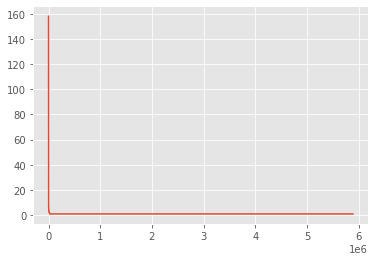

In [17]:
plt.plot(dist_des['counts'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

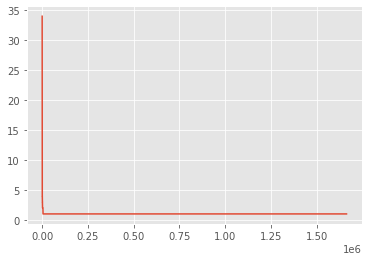

In [18]:
plt.plot(tdist_des['counts'])
plt.show

             distance  counts
0        10279.711965     158
1        10220.297073      79
2        10178.879759      79
3        10283.239255      79
4        10228.907706      79
...               ...     ...
5887884     95.772838       1
5887885   8807.555586       1
5887886     30.207838       1
5887887     14.161093       1
5887888    103.172499       1

[5887889 rows x 2 columns]


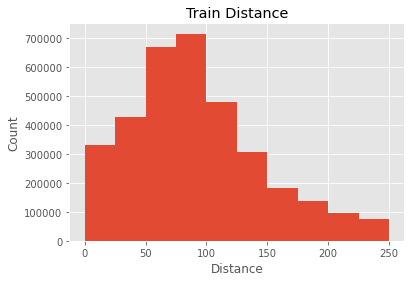

In [19]:
dist_des1=dist['distance'].value_counts().rename_axis('distance').reset_index(name='counts')
#dist_des1['%']=(dist_des1['counts']/5887889)*100
mean = np.mean(dist_des1['distance'])
sd = np.std(dist_des1['distance'])
dist_q = dist_des1[dist_des1['distance'] > mean - sd]
dist_q = dist_q[dist_q['distance'] < mean +  sd]
dist_q = dist_q[dist_q['distance'] < 250] 
dist_q.sort_values(by='distance', ascending=True)
x=dist_q['distance']
y=dist_q['counts']
plt.hist(x)
plt.grid=(True)
plt.title("Train Distance")
plt.xlabel("Distance")
plt.ylabel("Count")
plt.show
print(dist_des1)

             distance  counts
0        10279.711965      34
1        10212.924113      17
2        10204.615659      17
3        10283.239255      17
4        10268.174204      17
...               ...     ...
1663648    358.352159       1
1663649    166.326913       1
1663650   8726.308309       1
1663651    102.470665       1
1663652      0.000000       1

[1663653 rows x 2 columns]


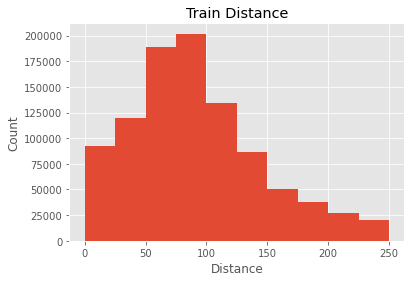

In [20]:
tdist_des1=tdist['distance'].value_counts().rename_axis('distance').reset_index(name='counts')
#tdist_des1['%']=(tdist_des1['counts']/1663653)*100
mean = np.mean(tdist_des1['distance'])
sd = np.std(tdist_des1['distance'])
tdist_q = tdist_des1[tdist_des1['distance'] > mean - sd]
tdist_q = tdist_q[tdist_q['distance'] < mean +  sd]
tdist_q = tdist_q[tdist_q['distance'] < 250] 
tdist_q.sort_values(by='distance', ascending=True)
x=tdist_q['distance']
y=tdist_q['counts']
plt.hist(x)
plt.grid=(True)
plt.title("Train Distance")
plt.xlabel("Distance")
plt.ylabel("Count")
plt.show
print(tdist_des1)

In [21]:
bin_list=[0,2,5,10,15,30,50,100,500,1000,5000,10000]

In [22]:
    dist4=dist[(dist['distance']>=(0))&(dist['distance']<=(5))]
    dist4=dist4['distance'].value_counts(bins=1).rename_axis('distance').reset_index(name='counts')
dist4

,distance,counts
0,"(-0.006, 5.0]",27961


In [23]:
dist5=pd.DataFrame(columns=['distance','counts'])
list_cycle = itertools.cycle(bin_list)
next(list_cycle)
for i in range(0,11):
    g=bin_list[i]
    next_element = next(list_cycle)
    dist4=dist[(dist['distance']>=(g))&(dist['distance']<=(next_element))]
    dist4=dist4['distance'].value_counts(bins=1).rename_axis('distance').reset_index(name='counts')
    dist5=dist5.append(dist4)
dist4=dist[(dist['distance']>=10000)]
dist4=dist4['distance'].value_counts(bins=1).rename_axis('distance').reset_index(name='counts')
dist5=dist5.append(dist4)
dist5['%']=(dist5['counts']/5887889)*100
dist5.reset_index(inplace = True) 
dist5.drop(columns=['index'])
dist5=dist5.drop(columns=['index'])
dist5.at[11,'distance']= '>10000'
dist5

,distance,counts,%
0,"(-0.003, 2.0]",6039,0.102566
1,"(1.9960000000000002, 5.0]",21922,0.372324
2,"(4.994, 10.0]",58597,0.995212
3,"(9.994, 15.0]",78987,1.34152
4,"(14.984, 30.0]",250795,4.25951
5,"(29.979, 50.0]",345137,5.86181
6,"(49.949000000000005, 100.0]",1392079,23.6431
7,"(99.59899999999999, 499.975]",1521432,25.84
8,"(499.505, 998.871]",3053,0.0518522
9,"(998.1750000000001, 4998.39]",199212,3.38342


In [24]:
tdist5=pd.DataFrame(columns=['distance','counts'])
list_cycle = itertools.cycle(bin_list)
next(list_cycle)
for i in range(0,11):
    g=bin_list[i]
    next_element = next(list_cycle)
    tdist4=tdist[(tdist['distance']>=(g))&(tdist['distance']<=(next_element))]
    tdist4=tdist4['distance'].value_counts(bins=1).rename_axis('distance').reset_index(name='counts')
    tdist5=tdist5.append(tdist4)
tdist4=tdist[(tdist['distance']>=10000)]
tdist4=tdist4['distance'].value_counts(bins=1).rename_axis('distance').reset_index(name='counts')
tdist5=tdist5.append(tdist4)
tdist5['%']=(tdist5['counts']/1663653)*100
tdist5.reset_index(inplace = True) 
tdist5=tdist5.drop(columns=['index'])
tdist5.at[11,'distance']= '>10000'
tdist5

,distance,counts,%
0,"(-0.003, 1.999]",1718,0.103267
1,"(1.997, 4.999]",5984,0.35969
2,"(4.994, 10.0]",16491,0.991252
3,"(9.994, 15.0]",21795,1.31007
4,"(14.984, 30.0]",70201,4.21969
5,"(29.979, 50.0]",96350,5.79147
6,"(49.949000000000005, 100.0]",391535,23.5347
7,"(99.59899999999999, 499.98]",423371,25.4483
8,"(499.596, 954.567]",1086,0.065278
9,"(1018.5640000000001, 3362.632]",56237,3.38033


In [25]:
dist

,customer_id,location_number,latitude_x,longitude_x,id,latitude_y,longitude_y,distance
0,02SFNJH,0,1.682392,-78.789737,4,-0.588596,0.754434,8847.430953
1,02SFNJH,0,1.682392,-78.789737,13,-0.471654,0.744470,8845.913268
2,02SFNJH,0,1.682392,-78.789737,20,-0.407527,0.643681,8834.488717
3,02SFNJH,0,1.682392,-78.789737,23,-0.585385,0.753811,8847.350413
4,02SFNJH,0,1.682392,-78.789737,28,0.480602,0.552850,8821.455686
...,...,...,...,...,...,...,...,...
5950295,HWELAU8,1,-0.067043,0.648221,849,-1.588060,-0.066441,186.863629
5950296,HWELAU8,1,-0.067043,0.648221,855,2.145206,0.745025,246.226148
5950297,HWELAU8,1,-0.067043,0.648221,856,0.251469,0.483632,39.866058
5950298,HWELAU8,1,-0.067043,0.648221,858,0.019817,0.587087,11.810814


In [26]:
dist['location_number_obj']=dist['location_number'].astype(str)
tdist['location_number_obj']=tdist['location_number'].astype(str)
dist['id_obj']=dist['id'].astype(str)
tdist['id_obj']=tdist['id'].astype(str)

In [27]:
dist['CID X LOC_NUM X VENDOR'] = dist['customer_id'] +' X '+ dist['location_number_obj'] +' X '+ dist['id_obj']
tdist['CID X LOC_NUM X VENDOR'] = tdist['customer_id'] +' X '+ tdist['location_number_obj'] +' X '+ tdist['id_obj']

In [28]:
serv_dist=orders[['CID X LOC_NUM X VENDOR','deliverydistance']]
serv_dist=serv_dist.groupby('CID X LOC_NUM X VENDOR').mean().reset_index()

In [29]:
dist =pd.merge(dist, serv_dist, on ='CID X LOC_NUM X VENDOR', how ='left')
tdist =pd.merge(tdist, serv_dist, on ='CID X LOC_NUM X VENDOR', how ='left')


In [30]:
dist_notn= dist[dist['deliverydistance'].notnull()]
dist_notn

,customer_id,location_number,latitude_x,longitude_x,id,latitude_y,longitude_y,distance,location_number_obj,id_obj,CID X LOC_NUM X VENDOR,deliverydistance
143,02SFNJH,1,1.679137,0.766823,192,1.703119,0.759958,2.773773,1,192,02SFNJH X 1 X 192,0.41
148,02SFNJH,1,1.679137,0.766823,199,2.337754,0.699575,73.615197,1,199,02SFNJH X 1 X 199,0.00
196,02SFNJH,1,1.679137,0.766823,855,2.145206,0.745025,51.881119,1,855,02SFNJH X 1 X 855,4.22
235,02SFNJH,2,-0.498648,0.661241,159,-0.599865,0.756244,15.435520,2,159,02SFNJH X 2 X 159,5.10
397,RU43CXC,0,0.100853,0.438165,856,0.251469,0.483632,17.494183,0,856,RU43CXC X 0 X 856,3.68
...,...,...,...,...,...,...,...,...,...,...,...,...
5950211,HWELAU8,1,-0.067043,0.648221,75,-0.600423,0.755909,60.505807,1,75,HWELAU8 X 1 X 75,6.84
5950240,HWELAU8,1,-0.067043,0.648221,188,-0.405660,0.644401,37.654916,1,188,HWELAU8 X 1 X 188,5.75
5950241,HWELAU8,1,-0.067043,0.648221,189,-0.856856,0.087738,107.688182,1,189,HWELAU8 X 1 X 189,0.00
5950259,HWELAU8,1,-0.067043,0.648221,259,0.025821,0.551594,14.902053,1,259,HWELAU8 X 1 X 259,6.37


In [31]:
dist5.reset_index(inplace = True) 
dist5.drop(columns=['index'])

,distance,counts,%
0,"(-0.003, 2.0]",6039,0.102566
1,"(1.9960000000000002, 5.0]",21922,0.372324
2,"(4.994, 10.0]",58597,0.995212
3,"(9.994, 15.0]",78987,1.34152
4,"(14.984, 30.0]",250795,4.25951
5,"(29.979, 50.0]",345137,5.86181
6,"(49.949000000000005, 100.0]",1392079,23.6431
7,"(99.59899999999999, 499.975]",1521432,25.84
8,"(499.505, 998.871]",3053,0.0518522
9,"(998.1750000000001, 4998.39]",199212,3.38342


In [32]:
o=[]
o1=[]
list_cycle = itertools.cycle(bin_list)
next(list_cycle)
for i in range(0,11):
    g=bin_list[i]
    next_element = next(list_cycle)
    dist4=dist[(dist['distance']>=(g))&(dist['distance']<=(next_element))]
    dist4=dist4[dist4['deliverydistance'].notnull()]
    o.append(len(dist4))
    temp = np.mean(dist4['deliverydistance'])
    o1.append(temp)
dist4=dist[(dist['distance']>=10000)]
dist4=dist4[dist4['deliverydistance'].notnull()]
o.append(len(dist4))
temp = np.mean(dist4['deliverydistance'])
o1.append(temp)
dist5['order_no']=o
dist5['order_%']=(dist5['order_no']/dist5['counts'])*100
dist5['delivery_dist_mean']=o1

In [33]:
o1

[1.35684204709432,
 1.9297861868526982,
 2.688790545622132,
 3.648549423865446,
 4.647401356968092,
 5.569161259467137,
 6.5303421183566215,
 7.204533692569265,
 0.0,
 0.0,
 0.0013973854550069806,
 0.09026455026455026]

In [34]:
dist4

,customer_id,location_number,latitude_x,longitude_x,id,latitude_y,longitude_y,distance,location_number_obj,id_obj,CID X LOC_NUM X VENDOR,deliverydistance
4455,XGE7RDS,1,-0.058052,-0.008463,231,205.242327,44.210807,14497.225503,1,231,XGE7RDS X 1 X 231,0.00
19955,REHZITA,1,-0.061999,-0.007986,231,205.242327,44.210807,14497.023384,1,231,REHZITA X 1 X 231,0.00
26355,ZPNWAZ5,1,-0.233522,0.097793,231,205.242327,44.210807,14496.035297,1,231,ZPNWAZ5 X 1 X 231,0.00
43754,ABA2DPM,2,-96.410577,43.558318,225,-0.815323,0.091491,10433.988862,2,225,ABA2DPM X 2 X 225,10.66
47355,91OOARV,2,-0.496894,0.090270,231,205.242327,44.210807,14478.813921,2,231,91OOARV X 2 X 231,0.00
107755,AA65956,1,-0.729545,0.099159,231,205.242327,44.210807,14464.960853,1,231,AA65956 X 1 X 231,0.00
147655,RZFR8K9,1,0.071850,-0.008111,231,205.242327,44.210807,14505.346616,1,231,RZFR8K9 X 1 X 231,0.00
156780,ICN6274,3,-96.407541,43.557974,537,-0.523719,0.052655,10465.743509,3,537,ICN6274 X 3 X 537,0.00
156789,ICN6274,3,-96.407541,43.557974,679,0.614094,0.527433,10595.941260,3,679,ICN6274 X 3 X 679,0.00
166973,HPERFQJ,0,204.519285,44.108331,356,-0.845096,0.067013,14497.334463,0,356,HPERFQJ X 0 X 356,0.01


<function matplotlib.pyplot.show(*args, **kw)>

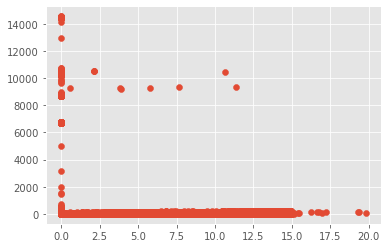

In [36]:
x=dist_notn['deliverydistance']
y=dist_notn['distance']
plt.scatter(x,y)
plt.show

In [37]:
dist_notn.describe()

,location_number,latitude_x,longitude_x,id,latitude_y,longitude_y,distance,deliverydistance
count,80142.000000,80137.000000,80137.000000,80142.000000,80142.000000,80142.000000,8.013700e+04,80142.000000
mean,0.839136,-0.095407,-22.975914,247.258441,1.036816,0.624916,2.655505e+03,3.986344
std,1.251256,7.517857,36.006437,230.270831,16.348097,3.494387,3.998608e+03,4.281229
min,0.000000,-671.738872,-134.415302,4.000000,-1.787413,-1.449556,7.183735e-12,0.000000
25%,0.000000,-0.442856,-78.509713,84.000000,-0.845096,0.080839,3.614478e+01,0.000000
50%,0.000000,-0.087130,0.011911,159.000000,-0.523719,0.482451,8.222786e+01,2.820000
75%,1.000000,0.178912,0.506170,304.000000,0.019817,0.605368,8.742081e+03,7.510000
max,25.000000,453.653846,44.108331,907.000000,205.242327,44.210807,1.455530e+04,19.810000


In [38]:
mean = np.mean(dist_notn['distance'])
sd = np.std(dist_notn['distance'])
print(mean)
print(sd)

2655.504918027568
3998.583274140622


In [39]:
dist_f = dist_notn[dist_notn['distance'] > mean - sd]
dist_f = dist_f[dist_f['distance'] < mean +  sd]

In [40]:
dist_f 

,customer_id,location_number,latitude_x,longitude_x,id,latitude_y,longitude_y,distance,location_number_obj,id_obj,CID X LOC_NUM X VENDOR,deliverydistance
143,02SFNJH,1,1.679137,0.766823,192,1.703119,0.759958,2.773773,1,192,02SFNJH X 1 X 192,0.41
148,02SFNJH,1,1.679137,0.766823,199,2.337754,0.699575,73.615197,1,199,02SFNJH X 1 X 199,0.00
196,02SFNJH,1,1.679137,0.766823,855,2.145206,0.745025,51.881119,1,855,02SFNJH X 1 X 855,4.22
235,02SFNJH,2,-0.498648,0.661241,159,-0.599865,0.756244,15.435520,2,159,02SFNJH X 2 X 159,5.10
397,RU43CXC,0,0.100853,0.438165,856,0.251469,0.483632,17.494183,0,856,RU43CXC X 0 X 856,3.68
...,...,...,...,...,...,...,...,...,...,...,...,...
5950211,HWELAU8,1,-0.067043,0.648221,75,-0.600423,0.755909,60.505807,1,75,HWELAU8 X 1 X 75,6.84
5950240,HWELAU8,1,-0.067043,0.648221,188,-0.405660,0.644401,37.654916,1,188,HWELAU8 X 1 X 188,5.75
5950241,HWELAU8,1,-0.067043,0.648221,189,-0.856856,0.087738,107.688182,1,189,HWELAU8 X 1 X 189,0.00
5950259,HWELAU8,1,-0.067043,0.648221,259,0.025821,0.551594,14.902053,1,259,HWELAU8 X 1 X 259,6.37


<function matplotlib.pyplot.show(*args, **kw)>

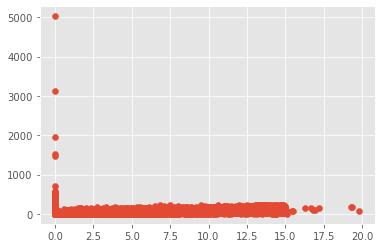

In [42]:
x=dist_f['deliverydistance']
y=dist_f['distance']
plt.scatter(x,y)
plt.show

In [43]:
dist_f = dist_f[dist_f['distance'] < 250] 
dist_f = dist_f[dist_f['deliverydistance'] < 15]

<function matplotlib.pyplot.show(*args, **kw)>

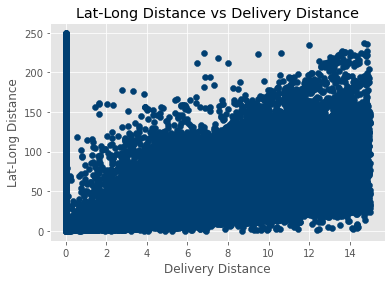

In [46]:
x=dist_f['deliverydistance']
y=dist_f['distance']
plt.scatter(x,y,color='#003F72')
plt.title("Lat-Long Distance vs Delivery Distance")
plt.xlabel("Delivery Distance")
plt.ylabel("Lat-Long Distance")
plt.show

In [47]:
dist_f.shape

(55939, 12)

In [48]:
from statistics import mean
def best_fit_slope_and_intercept(x,y):
    m = (((mean(x)*mean(y)) - mean(x*y)) /
         ((mean(x)*mean(x)) - mean(x*x)))
    
    b = mean(y) - m*mean(x)
    
    return m, b

m, b = best_fit_slope_and_intercept(x,y)

print(m,b)

3.2163574575777694 40.901583679408965


In [49]:
regression_line = [(m*x)+b for x in x]

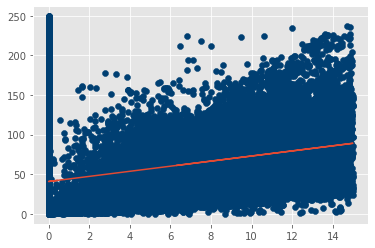

In [50]:
plt.scatter(x,y,color='#003F72')
plt.plot(x, regression_line)
plt.show()

In [51]:
dist_f

,customer_id,location_number,latitude_x,longitude_x,id,latitude_y,longitude_y,distance,location_number_obj,id_obj,CID X LOC_NUM X VENDOR,deliverydistance
143,02SFNJH,1,1.679137,0.766823,192,1.703119,0.759958,2.773773,1,192,02SFNJH X 1 X 192,0.41
148,02SFNJH,1,1.679137,0.766823,199,2.337754,0.699575,73.615197,1,199,02SFNJH X 1 X 199,0.00
196,02SFNJH,1,1.679137,0.766823,855,2.145206,0.745025,51.881119,1,855,02SFNJH X 1 X 855,4.22
235,02SFNJH,2,-0.498648,0.661241,159,-0.599865,0.756244,15.435520,2,159,02SFNJH X 2 X 159,5.10
397,RU43CXC,0,0.100853,0.438165,856,0.251469,0.483632,17.494183,0,856,RU43CXC X 0 X 856,3.68
...,...,...,...,...,...,...,...,...,...,...,...,...
5950211,HWELAU8,1,-0.067043,0.648221,75,-0.600423,0.755909,60.505807,1,75,HWELAU8 X 1 X 75,6.84
5950240,HWELAU8,1,-0.067043,0.648221,188,-0.405660,0.644401,37.654916,1,188,HWELAU8 X 1 X 188,5.75
5950241,HWELAU8,1,-0.067043,0.648221,189,-0.856856,0.087738,107.688182,1,189,HWELAU8 X 1 X 189,0.00
5950259,HWELAU8,1,-0.067043,0.648221,259,0.025821,0.551594,14.902053,1,259,HWELAU8 X 1 X 259,6.37


In [52]:

dist5

,index,distance,counts,%,order_no,order_%,delivery_dist_mean
0,0,"(-0.003, 2.0]",6039,0.102566,330,5.46448,1.356842
1,1,"(1.9960000000000002, 5.0]",21922,0.372324,1334,6.08521,1.929786
2,2,"(4.994, 10.0]",58597,0.995212,2866,4.89104,2.688791
3,3,"(9.994, 15.0]",78987,1.34152,3224,4.08168,3.648549
4,4,"(14.984, 30.0]",250795,4.25951,9162,3.65318,4.647401
5,5,"(29.979, 50.0]",345137,5.86181,10163,2.94463,5.569161
6,6,"(49.949000000000005, 100.0]",1392079,23.6431,18888,1.35682,6.530342
7,7,"(99.59899999999999, 499.975]",1521432,25.84,10328,0.678834,7.204534
8,8,"(499.505, 998.871]",3053,0.0518522,12,0.393056,0.000000
9,9,"(998.1750000000001, 4998.39]",199212,3.38342,4,0.00200791,0.000000


In [53]:
k=pd.Series(dist5['%'])

In [54]:
k.sum()

101.04979900266463

In [62]:
serv_dist=dist_f[['CID X LOC_NUM X VENDOR','deliverydistance']]
latlong_dist=dist_f[['CID X LOC_NUM X VENDOR','distance']]
latlong_dist1=latlong_dist.drop_duplicates(subset='CID X LOC_NUM X VENDOR', keep="first").reset_index()
serv_dist1=serv_dist.groupby('CID X LOC_NUM X VENDOR').mean().reset_index()
serv_dist1=serv_dist1.rename(columns={'deliverydistance':'mean'})
serv_dist2=serv_dist.groupby('CID X LOC_NUM X VENDOR').std().reset_index()
serv_dist2=serv_dist2.rename(columns={'deliverydistance':'std'})
serv_dist3=serv_dist.groupby('CID X LOC_NUM X VENDOR').min().reset_index()
serv_dist3=serv_dist3.rename(columns={'deliverydistance':'min'})
serv_dist4=serv_dist.groupby('CID X LOC_NUM X VENDOR').max().reset_index()
serv_dist4=serv_dist4.rename(columns={'deliverydistance':'max'})
serv_dist5=orders['CID X LOC_NUM X VENDOR'].value_counts().rename_axis('CID X LOC_NUM X VENDOR').reset_index(name='counts')
CLV_freq =pd.merge(latlong_dist1,serv_dist5, on ='CID X LOC_NUM X VENDOR', how ='left')
CLV_freq =pd.merge(CLV_freq,serv_dist1, on ='CID X LOC_NUM X VENDOR', how ='left')
CLV_freq =pd.merge(CLV_freq,serv_dist2, on ='CID X LOC_NUM X VENDOR', how ='left')
CLV_freq =pd.merge(CLV_freq,serv_dist3, on ='CID X LOC_NUM X VENDOR', how ='left')
CLV_freq =pd.merge(CLV_freq,serv_dist4, on ='CID X LOC_NUM X VENDOR', how ='left')
CLV_freq=CLV_freq.sort_values(by='counts', ascending=False).reset_index()
CLV_freq=CLV_freq.drop(columns=['index','level_0'])
CLV_freq

,CID X LOC_NUM X VENDOR,distance,counts,delivery distance,std,min,max
0,XW90EAP X 3 X 13,17.813302,69,1.514493,NaN,1.514493,1.514493
1,KXXRD9J X 2 X 157,2.861194,62,1.351452,NaN,1.351452,1.351452
2,3W4JVGN X 1 X 303,8.282563,61,3.222295,NaN,3.222295,3.222295
3,A46KPEA X 1 X 157,47.962003,49,6.598980,NaN,6.598980,6.598980
4,HSKCXYG X 1 X 113,48.813177,46,6.524348,NaN,6.524348,6.524348
...,...,...,...,...,...,...,...
55934,RLC32ZB X 0 X 398,27.557423,1,14.240000,NaN,14.240000,14.240000
55935,RLC32ZB X 0 X 849,98.119466,1,7.260000,NaN,7.260000,7.260000
55936,2HT7RZV X 0 X 43,15.309429,1,3.750000,NaN,3.750000,3.750000
55937,YCHG7IM X 1 X 43,84.001018,1,9.430000,NaN,9.430000,9.430000


In [56]:
serv_dist21=serv_dist2[serv_dist2['std'].notnull()]
serv_dist21

,CID X LOC_NUM X VENDOR,std
